# Fr predicts cell misses

author: steeve.laquitaine@epfl.ch

Results: 
- All cells fired at least once
- Sparse firing predicts cell misses

## Setup

```bash
pip install -r requirements_kilosort_silico.txt
```


In [1]:
# SETUP PACKAGES 
%load_ext autoreload
%autoreload 2
import os 
import pandas as pd
from matplotlib import pyplot as plt
import spikeinterface as si
import numpy as np
import matplotlib

# dpi = 300
# matplotlib.rcParams['figure.dpi'] = dpi

# SET PROJECT PATH
PROJ_PATH = "/gpfs/bbp.cscs.ch/project/proj68/home/laquitai/spike-sorting"
os.chdir(PROJ_PATH)

# SET DEPENDENCIES
from src.nodes.utils import get_config
from src.nodes.postpro.missed_cells import get_missed_vs_detected, plot_missed_cells_rate_hist
from src.nodes.postpro.cell_matching import match_true_and_sorter_cell_firing_rate as match_fr
from src.nodes.postpro.feateng import add_true_spike_count, add_sorted_spike_count

# SET RUN CONFIG
EXPERIMENT = "silico_neuropixels"
SIMULATION_DATE = "2023_02_19"
data_conf, _ = get_config(EXPERIMENT, SIMULATION_DATE).values()

2023-04-25 18:50:34,775 - root - utils.py - get_config - INFO - Reading experiment config.
2023-04-25 18:50:34,801 - root - utils.py - get_config - INFO - Reading experiment config. - done


## Plot

In [2]:
# add true and sorted cell features

# - add true and sorted firing rates
cell_matching = match_fr(data_conf, no_plot=True)

# add true spike counts
cell_matching = add_true_spike_count(cell_matching, data_conf)

# add sorted spike counts
cell_matching = add_sorted_spike_count(cell_matching, data_conf)

2023-04-25 18:50:35,092 - root - match_sorted_to_true_neuropixels_2023_02_19.py - run - INFO - loading kilosort3 Sorting Extractor
2023-04-25 18:50:35,124 - root - match_sorted_to_true_neuropixels_2023_02_19.py - run - INFO - loading kilosort3 Sorting Extractor - done: 0.0
2023-04-25 18:50:35,131 - root - match_sorted_to_true_neuropixels_2023_02_19.py - run - INFO - loading Ground truth Sorting Extractor
2023-04-25 18:50:35,148 - root - match_sorted_to_true_neuropixels_2023_02_19.py - run - INFO - loading Ground truth Sorting Extractor - done: 0.0
2023-04-25 18:50:51,746 - root - match_sorted_to_true_neuropixels_2023_02_19.py - run - INFO - Detecting true cell oversplit - done
2023-04-25 18:50:51,753 - root - match_sorted_to_true_neuropixels_2023_02_19.py - run - INFO - Detecting true cell misses - done
2023-04-25 18:50:51,892 - root - match_sorted_to_true_neuropixels_2023_02_19.py - run - INFO - loading kilosort3 Sorting Extractor
2023-04-25 18:50:51,905 - root - match_sorted_to_true_

/gpfs/bbp.cscs.ch/project/proj68/home/laquitai/spike-sorting/src/pipes/sorting/match_sorted_to_true_neuropixels_2023_02_19.py:94: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cell_matching["oversplit_true_cell"].iloc[oversplit.index] = True


2023-04-25 18:51:01,600 - root - match_sorted_to_true_neuropixels_2023_02_19.py - run - INFO - Detecting true cell oversplit - done
2023-04-25 18:51:01,606 - root - match_sorted_to_true_neuropixels_2023_02_19.py - run - INFO - Detecting true cell misses - done
2023-04-25 18:51:01,671 - root - match_sorted_to_true_neuropixels_2023_02_19.py - run - INFO - loading kilosort3 Sorting Extractor
2023-04-25 18:51:01,682 - root - match_sorted_to_true_neuropixels_2023_02_19.py - run - INFO - loading kilosort3 Sorting Extractor - done: 0.0
2023-04-25 18:51:01,684 - root - match_sorted_to_true_neuropixels_2023_02_19.py - run - INFO - loading Ground truth Sorting Extractor
2023-04-25 18:51:01,693 - root - match_sorted_to_true_neuropixels_2023_02_19.py - run - INFO - loading Ground truth Sorting Extractor - done: 0.0


/gpfs/bbp.cscs.ch/project/proj68/home/laquitai/spike-sorting/src/pipes/sorting/match_sorted_to_true_neuropixels_2023_02_19.py:94: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cell_matching["oversplit_true_cell"].iloc[oversplit.index] = True


2023-04-25 18:51:12,105 - root - match_sorted_to_true_neuropixels_2023_02_19.py - run - INFO - Detecting true cell oversplit - done
2023-04-25 18:51:12,110 - root - match_sorted_to_true_neuropixels_2023_02_19.py - run - INFO - Detecting true cell misses - done


/gpfs/bbp.cscs.ch/project/proj68/home/laquitai/spike-sorting/src/pipes/sorting/match_sorted_to_true_neuropixels_2023_02_19.py:94: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cell_matching["oversplit_true_cell"].iloc[oversplit.index] = True


In [3]:
# check cell matching
cell_matching

/gpfs/bbp.cscs.ch/project/proj68/home/laquitai/spike-sorting/env_kilosort_silico/lib/python3.9/site-packages/IPython/lib/pretty.py:778: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  output = repr(obj)
/gpfs/bbp.cscs.ch/project/proj68/home/laquitai/spike-sorting/env_kilosort_silico/lib/python3.9/site-packages/IPython/core/formatters.py:342: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  return method()


,sorted_cell,true_cell_match,oversplit_true_cell,agreement_score,true firing rate,ks3 firing rate,true spike count,sorted spike count
0,0.0,1981516,True,0.430918,4.538273,3.540071,2496,1947.0
1,215.0,1981516,True,0.000717,4.538273,1.401846,2496,771.0
2,1.0,3427256,True,0.000000,0.280006,1.070931,154,589.0
3,45.0,3427256,True,0.000000,0.280006,0.205459,154,113.0
4,2.0,2145865,False,0.000880,1.756399,1.787308,966,983.0
...,...,...,...,...,...,...,...,...
640,NaN,4046827,None,NaN,0.003636,NaN,2,NaN
641,NaN,4138989,None,NaN,2.105497,NaN,1158,NaN
642,NaN,4063216,None,NaN,0.003636,NaN,2,NaN
643,NaN,2623483,None,NaN,1.485484,NaN,817,NaN


In [4]:
# get Recording extractor
Recording = si.load_extractor(
    data_conf["preprocessing"]["output"]["trace_file_path"]
)
trace_duration = Recording.get_total_duration()

In [5]:
# run sanity check

# check that firing rates and spike counts match
firing_rate = cell_matching["true spike count"]  / trace_duration
assert all(firing_rate == cell_matching["true firing rate"]), "true spike count and firing rate do not match"

firing_rate = cell_matching["sorted spike count"]  / trace_duration
notna = cell_matching["ks3 firing rate"].notna()
assert all(firing_rate[notna] == cell_matching["ks3 firing rate"][notna]), "sorted spike count and firing rate do not match"

Results: 
- All cells fired at least once
- Sparse firing predicts cell misses

Spike counts have data type int64.
There is 0 silent (that never fired) cells.


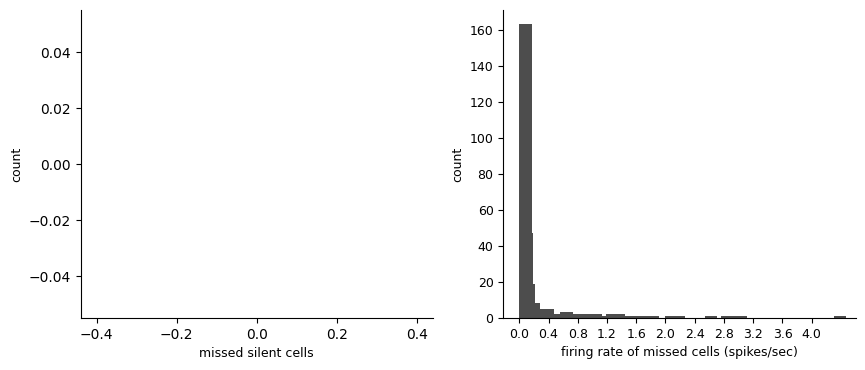

In [6]:
# plot cell misses by firing rate
# get missed vs. detected cells
missed_cells, detected_cells = get_missed_vs_detected(cell_matching).values()

# plot
fig, axes = plt.subplots(1,2, figsize=(10,4))

# report spike count data type
print(f"""Spike counts have data type {missed_cells["true spike count"].dtype}.""")

# plot cell bar count that do never fire
n_silent_cells = sum(missed_cells["true spike count"]==0)
axes[0].bar(x=0, height=n_silent_cells)
axes[0].spines[["right", "top"]].set_visible(False)
axes[1].set_xticks(np.array([0]))
axes[1].set_xticklabels(np.array([0]), fontsize=9)
axes[0].set_xlabel("missed silent cells", fontsize=9)
axes[0].set_ylabel("count", fontsize=9)

print(f"""There is {n_silent_cells} silent (that never fired) cells.""")

# plot hist for cells that fire at least 1 spike
axes[1] = plot_missed_cells_rate_hist(axes[1], missed_cells, "", bin_step=0.02)

firing rate for one spike: 0.001818218182545469 spikes/sec


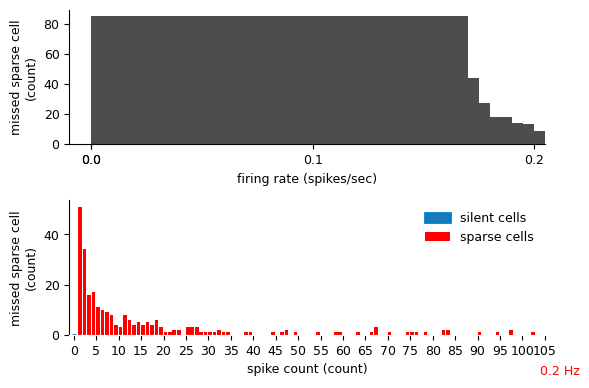

In [29]:
# zoom-in on the distribution of sparse cells (below 0.2 Hz)
fig, axes = plt.subplots(2,1, figsize=(6,4))

sparse_cells = missed_cells[missed_cells["true firing rate"] < 0.2]

# plot

# set default parameters
MAX_RATE = 0.2
BIN_STEP = 0.005
X_STEP = 0.05

# set firing rate bins
BINS = np.arange(0, MAX_RATE, BIN_STEP)

# plot histogram
axes[0] = sparse_cells["true firing rate"].hist(
    ax=axes[0], bins=BINS, width=0.17, color=[0.3, 0.3, 0.3]
)

# legend
axes[0].set_xlabel("firing rate (spikes/sec)", fontsize=9)
axes[0].set_ylabel("missed sparse cell" "\n" "(count)", fontsize=9)
axes[0].set_xticks(np.round(np.arange(0, MAX_RATE, X_STEP), 1))
axes[0].set_xticklabels(np.round(np.arange(0, MAX_RATE, X_STEP), 1), fontsize=9)
axes[0].grid(False)
axes[0].spines[["right", "top"]].set_visible(False)
axes[0].tick_params(axis="both", which="major", labelsize=9)

# firing rate for one spike
print("firing rate for one spike:", 1/trace_duration, "spikes/sec")

# plot associated spike counts
# set parameters
spike_count_sparsity = MAX_RATE * trace_duration
MAX_COUNT = spike_count_sparsity
BIN_STEP = 1
X_STEP = 5

# set bins
BINS = np.arange(0, MAX_COUNT, BIN_STEP)

# plot histogram

# bar silent cells
axes[1].bar(0, 0, edgecolor=(0,0.5,0.8), linewidth=2)

# bar sparse cells
axes[1] = missed_cells["true spike count"].hist(ax=axes[1],
    bins=BINS, width=0.81, color=[0.3, 0.3, 0.3], linewidth=2, facecolor="r"
)

# legend
axes[1].set_xlabel("spike count (count)", fontsize=9)
axes[1].set_ylabel("missed sparse cell" "\n" "(count)", fontsize=9)
axes[1].set_xticks(np.round(np.arange(0, MAX_COUNT, X_STEP), 1))
axes[1].set_xticklabels(np.round(np.arange(0, MAX_COUNT, X_STEP).astype(int), 1), fontsize=9)
axes[1].grid(False)
axes[1].spines["bottom"].set_edgecolor("white")
axes[1].spines[["right", "top"]].set_visible(False)
axes[1].tick_params(axis="both", which="major", labelsize=9)
axes[1].legend(["silent cells", "sparse cells", "firing cells"], frameon=False, fontsize=9)

max_spike_count = axes[1].get_xticks()[-1]
axes[1].set_xlim([-1, max_spike_count])

# annotate firing rates correspondances
max_x_as_fr = round(max(BINS)/trace_duration,2)
axes[1].text(0.99, -0.3, f"{max_x_as_fr} Hz",
        fontsize=9, transform=axes[1].transAxes, color='r')

plt.tight_layout()

In [11]:
trace_duration * 0.2

109.99780000000001

In [21]:
BINS

array([  0.,   1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.,  10.,
        11.,  12.,  13.,  14.,  15.,  16.,  17.,  18.,  19.,  20.,  21.,
        22.,  23.,  24.,  25.,  26.,  27.,  28.,  29.,  30.,  31.,  32.,
        33.,  34.,  35.,  36.,  37.,  38.,  39.,  40.,  41.,  42.,  43.,
        44.,  45.,  46.,  47.,  48.,  49.,  50.,  51.,  52.,  53.,  54.,
        55.,  56.,  57.,  58.,  59.,  60.,  61.,  62.,  63.,  64.,  65.,
        66.,  67.,  68.,  69.,  70.,  71.,  72.,  73.,  74.,  75.,  76.,
        77.,  78.,  79.,  80.,  81.,  82.,  83.,  84.,  85.,  86.,  87.,
        88.,  89.,  90.,  91.,  92.,  93.,  94.,  95.,  96.,  97.,  98.,
        99., 100., 101., 102., 103., 104., 105., 106., 107., 108., 109.])